In [1]:
## Import Packages and CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

df = pd.read_csv('states_all.csv')

sns.set(style = "darkgrid")

In [2]:
## A Table containing values for California Only (Stored as a Variable)
CA_isolated = df.loc[lambda df: df['STATE'] == 'CALIFORNIA', :]

# Research Proposal: An Analysis of the Effect of Instructional Spending on California State Test Scores

In [3]:
## View DataFrame
#df

## Introduction

Education is an institution that is vital to a state’s economic growth. The graduates produced by public schools account for the majority of the future talent pool that will be employed by businesses, ultimately driving the economy. Public schools themselves are nonprofit businesses funded by multiple government sources with the primary goal of producing quality graduates. For this reason, it is worthwhile to take a look into the financial information of California Schools as it pertains to enrollment and test scores. Understanding how finances play a role in the schools’ test scores allow for greater insights into how to more efficiently run schools while increasing the quality of its graduates. <br>
    
Financial data, enrollment data, and test score data has been taken from the U.S. Census Bureau and National Assessment of Educational Progress NAEP). The test score data consists of the results from the Math and Reading exams administered by the NAEP to 4th and 8th grade students. Analysis of this compiled dataset was used to look for insights that could further the economic and academic progress of California schools.

## Analysis of the Data

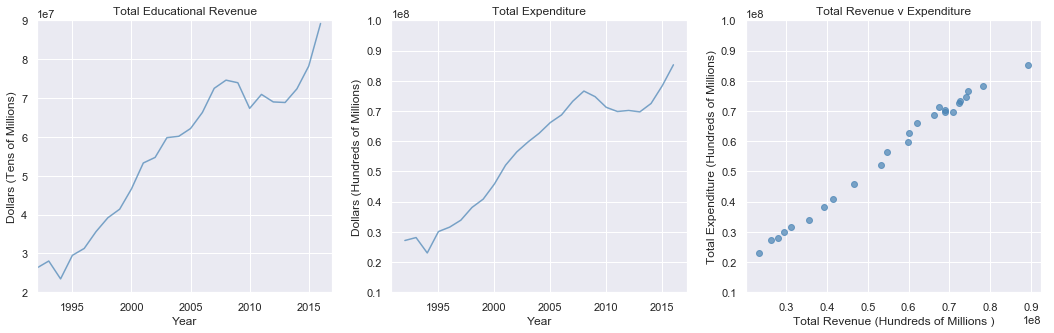

In [4]:
### Plot Financials

plt.figure(figsize = (18, 5))

## Plot Total Revenues

plt.subplot(1,3,1)
plt.plot(CA_isolated['YEAR'], CA_isolated['TOTAL_REVENUE'], color = 'steelblue', alpha = 0.7)
plt.xlim([1992, 2017])
plt.ylim([20000000, 90000000])
plt.title('Total Educational Revenue')
plt.xlabel('Year')
plt.ylabel('Dollars (Tens of Millions)')

## Plot Total Expenditure

plt.subplot(1,3,2)
plt.plot(CA_isolated['YEAR'], CA_isolated['TOTAL_EXPENDITURE'], color = 'steelblue', alpha = 0.7)
plt.title('Total Expenditure')
plt.xlabel('Year')
plt.ylabel('Dollars (Hundreds of Millions)')
plt.ylim([10000000,100000000])

## Plot Revenue v. Expenditure

plt.subplot(1,3,3)
plt.scatter(CA_isolated['TOTAL_REVENUE'], CA_isolated['TOTAL_EXPENDITURE'], color = 'steelblue', alpha = 0.7)
plt.title('Total Revenue v Expenditure')
plt.xlabel('Total Revenue (Hundreds of Millions )')
plt.ylabel('Total Expenditure (Hundreds of Millions)')
plt.ylim([10000000,100000000])

plt.show()

To get a general understanding of how the finances of California schools have changed over time, I looked at their total revenue and expenditure over the past couple of decades. Both revenue and expenditure experience similar trends, increasing consistently with the exception of drops around 1993 and 2007.

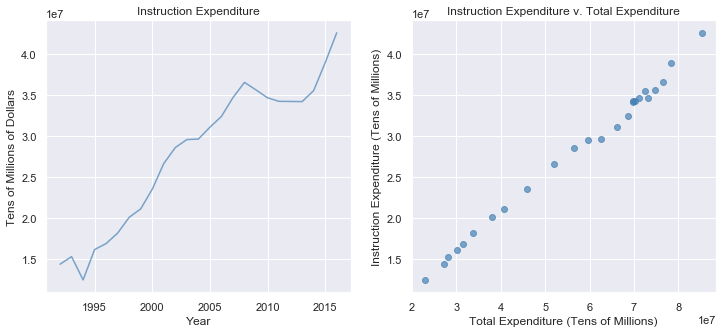

In [5]:
### Plot Instruction Expenditure

plt.figure(figsize = (12, 5))

## Plot Instruction Expenditure

plt.subplot(1,2,1)
plt.plot(CA_isolated['YEAR'], CA_isolated['INSTRUCTION_EXPENDITURE'], color = 'steelblue', alpha=0.7 )
plt.title('Instruction Expenditure')
plt.xlabel('Year')
plt.ylabel('Tens of Millions of Dollars')

## Plot Instruction Expenditure v. Total Expenditure

plt.subplot(1,2,2)
plt.scatter(CA_isolated['TOTAL_EXPENDITURE'], CA_isolated['INSTRUCTION_EXPENDITURE'], color = 'steelblue', alpha=0.7 )
plt.title('Instruction Expenditure v. Total Expenditure')
plt.xlabel('Total Expenditure (Tens of Millions)')
plt.ylabel('Instruction Expenditure (Tens of Millions)')

plt.show()



I looked at instruction expenditure to draw more of a connection between the schools’ finances and student outcomes (since money spent on teaching would most likely have more of an effect on students than money spent on administrative costs). Instruction Expenditure was roughly half of total expenditure for all years recorded.

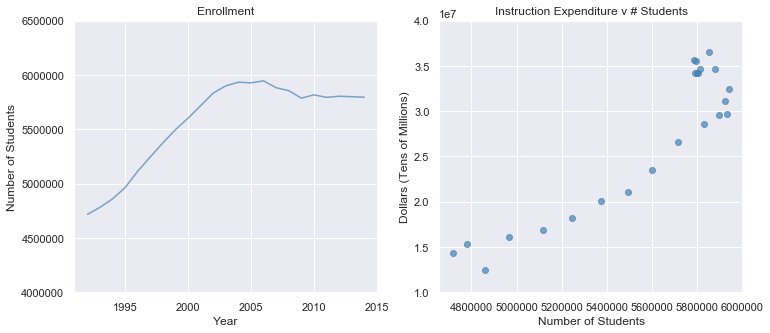

In [6]:
### Plot Data as it Relates to Enrollment

plt.figure(figsize=(12, 5))

## Plot Total Enrollment

plt.subplot(1,2,1)
plt.plot(CA_isolated['YEAR'],CA_isolated['GRADES_ALL_G'], color = 'steelblue', alpha = 0.7)
plt.title('Enrollment')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.ylim([4000000,6500000])

## Plot Instruction Expenditure v Students Enrolled

plt.subplot(1,2,2)
plt.scatter(CA_isolated['GRADES_ALL_G'],CA_isolated['INSTRUCTION_EXPENDITURE'], color = 'steelblue', alpha = 0.7)
plt.title('Instruction Expenditure v # Students')
plt.xlabel('Number of Students')
plt.ylabel('Dollars (Tens of Millions)')
plt.ylim([10000000,40000000])

plt.show()

Next, I looked at enrollment to better understand how consistent instructional spending is with the need of teaching resources (a larger number of students means that there is a greater need of resources to teach them). There was a steady increase in the number of students enrolling until 2007 where the figure dropped slowly then plateaued. While instructional expenditure saw a sharp recovery and increase around 2013, enrollment numbers stagnated (best reflected by the clustering in the scatter plot).

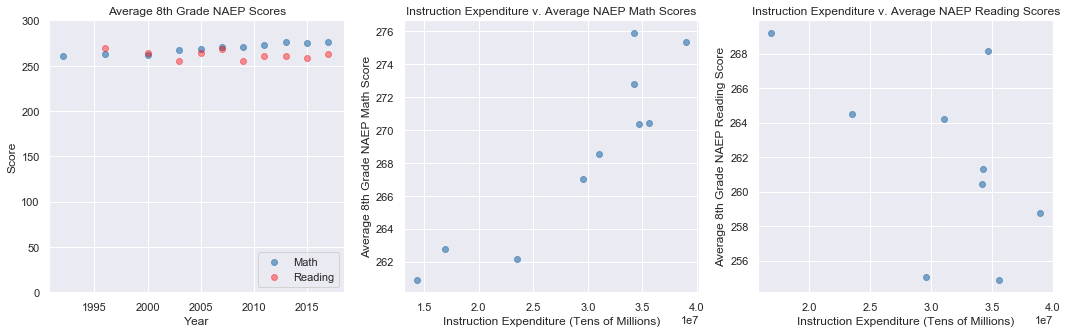

In [7]:
## Plot NAEP Test Scores and Their relationship to Instruction Expediture

plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)

## Plot 8th Grade NAEP Math Score

plt.scatter(CA_isolated['YEAR'],CA_isolated['AVG_MATH_8_SCORE'], color = 'steelblue', alpha = 0.7, label = 'Math')
plt.title('Average 8th Grade NAEP Scores')
plt.xlabel('Year')
plt.ylabel('Score')
plt.ylim([0,300])

## Plot 8th Grade NAEP Reading Score

plt.scatter(CA_isolated['YEAR'],CA_isolated['AVG_READING_8_SCORE'], color = 'red', alpha = 0.4, label = 'Reading')
plt.title('Average 8th Grade NAEP Scores')
plt.xlabel('Year')
plt.ylabel('Score')
plt.ylim([0,300])

plt.legend(loc='lower right')


plt.subplot(1,3,2)

## Plot 8th Grade NAEP Math Score v. Instruction Expenditure

plt.scatter(CA_isolated['INSTRUCTION_EXPENDITURE'], CA_isolated['AVG_MATH_8_SCORE'], color = 'steelblue', alpha=0.7 )
plt.title('Instruction Expenditure v. Average NAEP Math Scores')
plt.xlabel('Instruction Expenditure (Tens of Millions)')
plt.ylabel('Average 8th Grade NAEP Math Score')


plt.subplot(1,3,3)

## Plot 8th Grade NAEP Reading Score v. Instruction Expenditure

plt.scatter(CA_isolated['INSTRUCTION_EXPENDITURE'], CA_isolated['AVG_READING_8_SCORE'], color = 'steelblue', alpha = 0.7)
plt.title('Instruction Expenditure v. Average NAEP Reading Scores')
plt.xlabel('Instruction Expenditure (Tens of Millions)')
plt.ylabel('Average 8th Grade NAEP Reading Score')

plt.show()

I plotted the average test scores of California 8th grade students who took the NAEP Exams. The average math scores of the students increased slightly since 1996, while the average reading scores showed little to no discernible change. Since the scores show little change over the past couple of decades, no correlation can be drawn between them and instruction spending at any given year.

## Assessing the the Progress of California's 8th grade Students

While instruction expenditure increased, the number of students enrolling stagnated after 2013. The existence of discrepancies between changes in the number of students that enroll and the changes in the amount of spending on teaching show that administrative factors don’t restrict the amount of money spent teaching to the purely to the number of students enrolled.  With this in mind, it is worthwhile to see whether or not increasing the amount of instructional spending per student yields better test scores.

While the NAEP is good for comparing the relative abilities of students from different states, the California Assessment of Student Performance and Progress (CAASPP) exam makes for a better means of assessing the results of California Schools. The CAASPP exam tests based on standards set forth by the California Department of Education. The curriculum of California schools adheres more closely to these standards (than those of the NAEP exam) since they are tied to rankings and funding of these schools. 

I will be conducting a study to measure the effects of instruction expenditure on California 8th grade students’ CAASPP scores. I expect that increasing instructional spending per student by 15% will result in an increase of CAASSP Scores in California's 8th grade Students.


## Experimental Design

Two random, nearly identical samples of California schools that have 8th grade students who take the CAASPP exam will be taken. For each sample, the following information will be recorded over the course of the past two testing periods (2 years): The number of students enrolled at the 8th grade level in each school, the amount of money allocated to teaching expenses for the 8th grade in each of these schools, the average test scores of the students at each school. This will ensure that the two samples are similar enough to conduct the rest of the study and provide a reference to test the results against. The samples should be large enough so that the results can be safely used to make generalizations about the population, but no larger to minimize the cost of the study.

The two samples will each be treated to different financial conditions after initial information has been recorded. One sample will allocate funds to teaching their 8th grade students without any intervention. This will be the control sample, or Group A. The second sample will have 15% more money allocated to teaching their 8th grade students than it would have without intervention from the study. The additional funds should come from sources outside of the schools, as opposed from being taken from other budgets within the schools, to avoid fundamentally altering the schools outside the scope of the study. This second sample will be the test sample, or Group B. The primary difference between the groups is that Group B will have a larger amount of money per student allocated to teaching at the 8th grade level.

For each sample the following information will be recorded over the course of the next two testing periods (2 years): The number of students enrolled at the 8th grade level in each school, the amount of money allocated to teaching expenses for the 8th grade in each of these schools, the average test scores of the students at each school. The expectation is that Group B’s average test scores will be significantly higher than those of Group A in the second year of the study.

After the study there should be two sets of test scores for each of the following groups of data: Group A before the study started, Group A after the study started, Group B before the study started and Group B after the study started. The test scores of Group A and B will be compared by performing a T-test and acquiring a probability value. 

If the Group B is determined to be significantly larger than Group A then it can be determined that increasing instructional spending resulted in higher CAASPP test scores. If Group B is determined to be significantly lower than Group A then it can be determined that increasing instructional spending resulted in lower scores at these schools. 

## Conclusion

This study determining what effect instructional spending has on 8th grade CAASPP test scores can be used to make financial decisions. Results that support the hypothesis can be used as support for policies or administrative decisions that increase funding to California Schools. 